In [19]:
import cv2
import cvbase as cvb
import matplotlib.pyplot as plt
import numpy as np

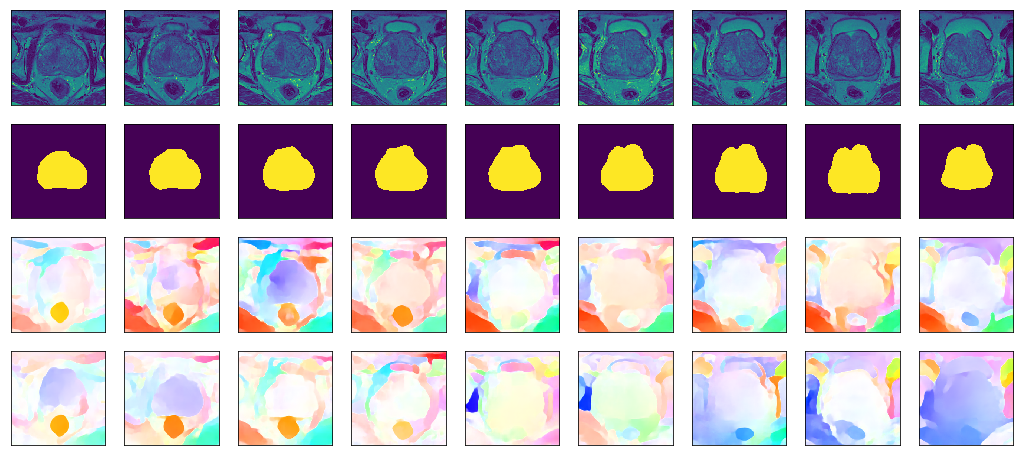

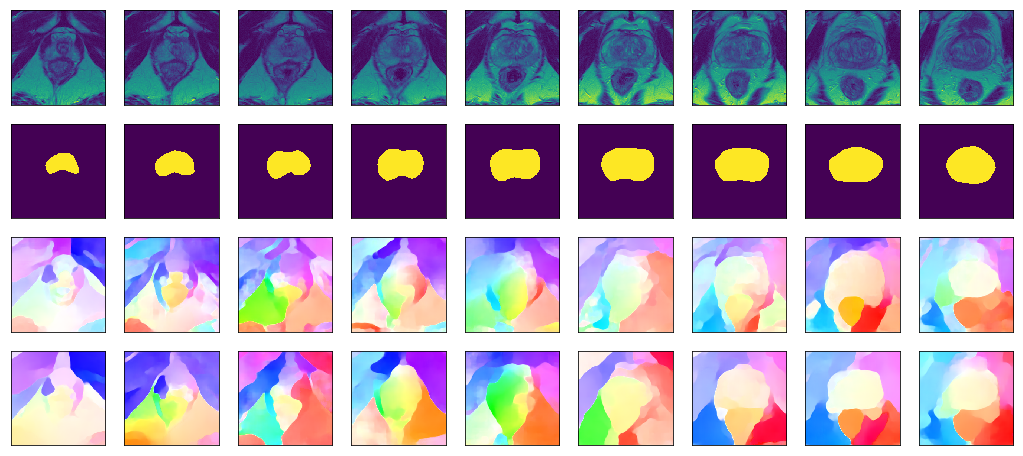

In [27]:
n = 10  # how many digits we will display
case_num = 29
lyr_l = 5
lyr_r = lyr_l+10

for case_num in [23,31]:
    plt.figure(figsize=(20, 8))
    for i in range(1,n):
        # display original
        img = np.load('/home/hsun/PROMISE_12_RL/npy256data_clip/Case'+ str(case_num) +  'lyr' + str(lyr_l+i-1)+'.npy') 
        ax = plt.subplot(4,n,i)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        seg = np.load('/home/hsun/PROMISE_12_RL/npy256data_clip/Case'+ str(case_num) +  'lyr' + str(lyr_l+i-1)+'_seg.npy') 
        ax = plt.subplot(4,n,i+n)
        plt.imshow(seg)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        flow_path = '/home/hsun/PROMISE_12_RL/npy256data_clip/Flow/Case'+ str(case_num) +  'lyr' + str(lyr_l+i-1)+'_optic_flow.flo'
        flow = cvb.read_flow(flow_path)
        flow_rgb = cvb.flow2rgb(flow)
        ax = plt.subplot(4, n ,i + n +n)
        plt.imshow(flow_rgb)
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        flow_path = '/home/hsun/PROMISE_12_RL/npy256data_clip/Flow/Case'+ str(case_num) +  'lyr' + str(lyr_l+i-1)+'_optic_flow.rflo'
        flow = cvb.read_flow(flow_path)
        flow_rgb = cvb.flow2rgb(flow)
        ax = plt.subplot(4, n ,i + n*3)
        plt.imshow(flow_rgb)
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.show()

In [28]:
import pandas as pd
df = pd.read_csv("fname_lst_nxt_out_clip.txt",delimiter=' ',header=None)

In [29]:
img_set = []
seg_set = []
flo_set = []
rflo_set = []
flo_set_rgb = []
rflo_set_rgb = []
for i in range(len(df)):
    img = np.load(df[0:][0][i]) 
    img_set.append(img)
    
    seg_path = df[0:][0][i][:-4] + '_seg.npy'
    seg = np.load(seg_path) 
    seg_set.append(seg)
    
    flo_path = df[0:][3][i]
    flo = cvb.read_flow(flo_path)
    flo_rgb = cvb.flow2rgb(flo)
    flo_set_rgb.append(flo_rgb)
    flo_set.append(flo)
    
    rflo_path = df[0:][4][i]
    rflo = cvb.read_flow(rflo_path)
    rflo_rgb = cvb.flow2rgb(rflo)
    rflo_set_rgb.append(rflo_rgb)
    rflo_set.append(rflo)
    

In [30]:
img_set = np.asarray(img_set)
seg_set = np.asarray(seg_set)
flo_set = np.asarray(flo_set)
rflo_set = np.asarray(rflo_set)
flo_set_rgb = np.asarray(flo_set_rgb)
rflo_set_rgb = np.asarray(rflo_set_rgb)

In [31]:
flo_set.shape

(1277, 256, 256, 2)

In [32]:
np.save("img_set_clip.npy",img_set)
np.save("seg_set_clip.npy",seg_set)
np.save("flo_set_rgb_clip.npy",flo_set_rgb)
np.save("rflo_set_rgb_clip.npy",rflo_set_rgb)